<a href="https://colab.research.google.com/github/ksy-20908/Classification-of-CIFAR-10-datasets/blob/main/20908_%EA%B9%80%EC%8A%B9%EC%97%B0_CIFAR_10_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow 버전을 확인합니다: 2.3.0
170500096/170498071 [==============================] - 4s 0us/step
학습에 사용할 이미지는 50000개 입니다.
학습한 후 테스트(검증)에 사용할 이미지는 10000개 입니다.
데이터의 레이블은 10개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.
레이블 번호와 레이블: 
0: Airplane
1: Automobile
2: Bird
3: Cat
4: Deer
5: Dog
6: Frog
7: Horse
8: Ship
9: Truck
학습 이미지 형태: (50000, 32, 32, 3)
학습 레이블 형태: (50000, 1)
테스트 이미지 형태: (10000, 32, 32, 3)
테스트 레이블 형태: (10000, 1)
데이터 상태
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]


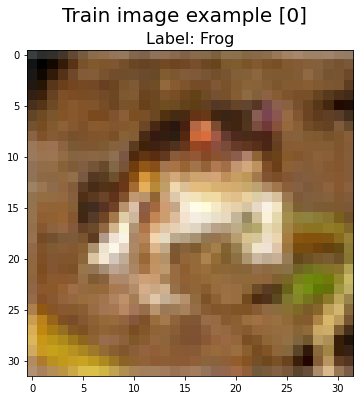

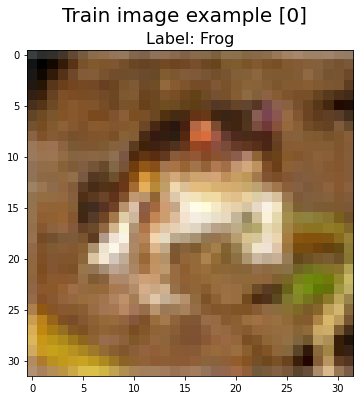

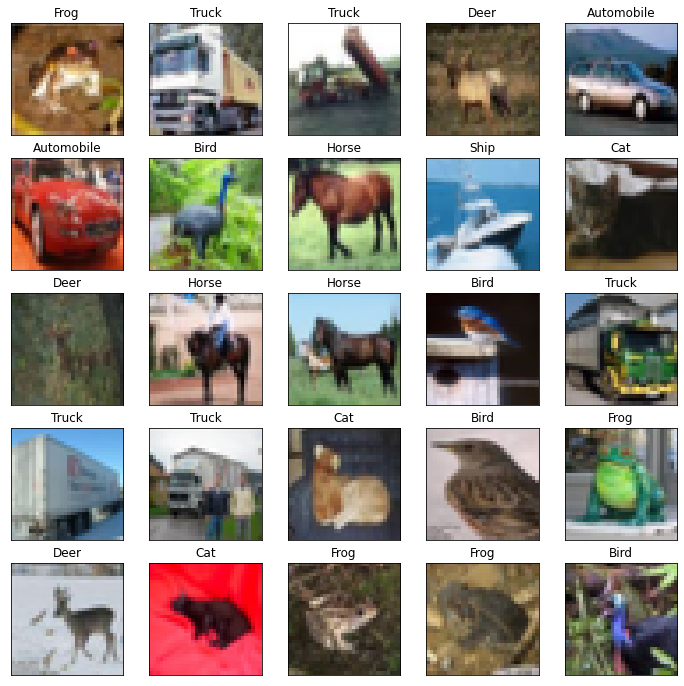

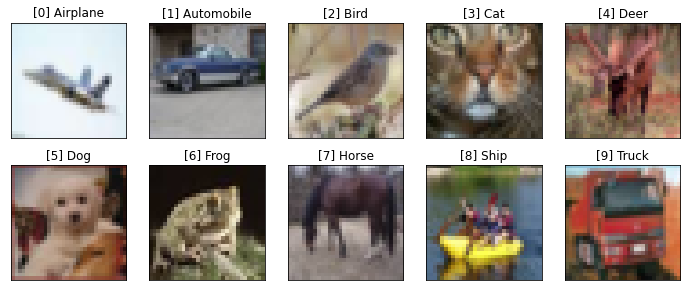

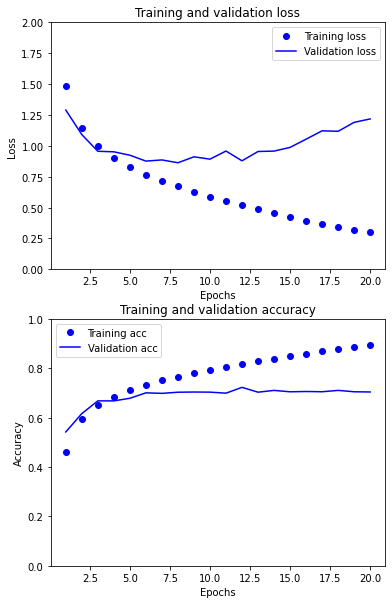

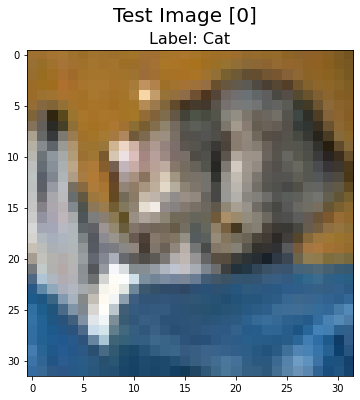

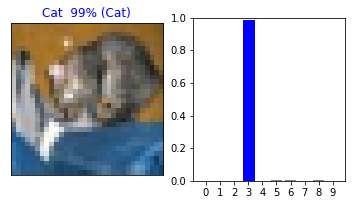

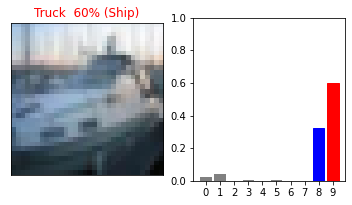

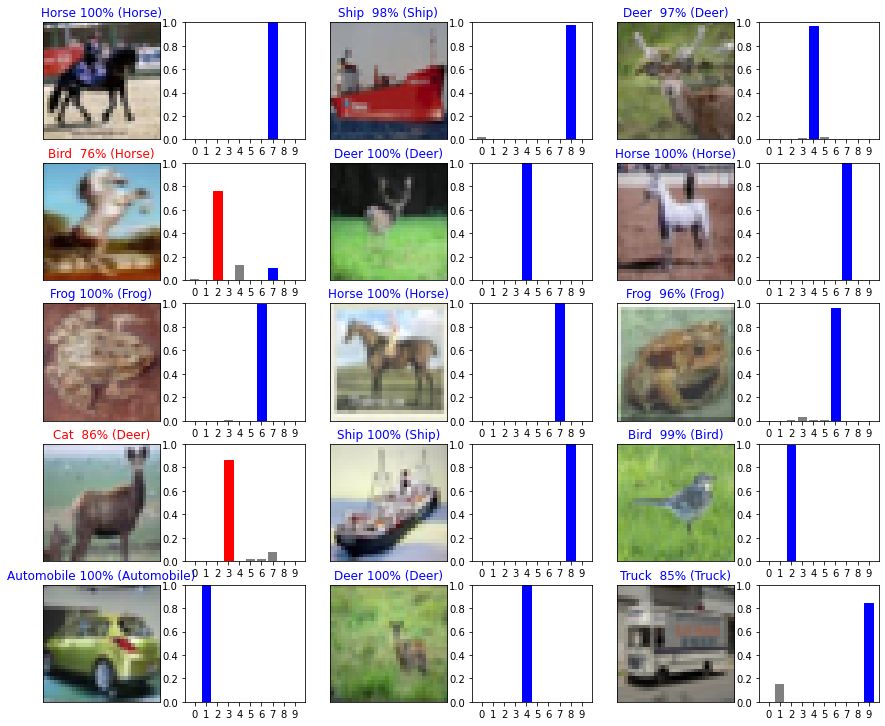

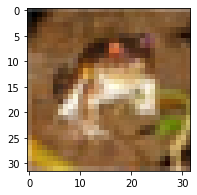

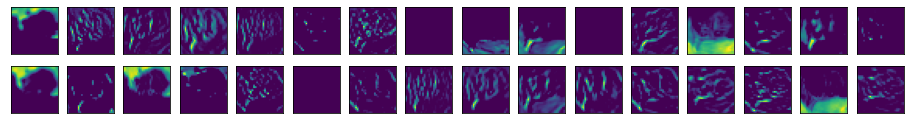

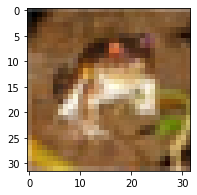

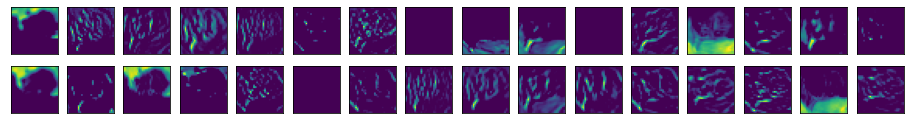

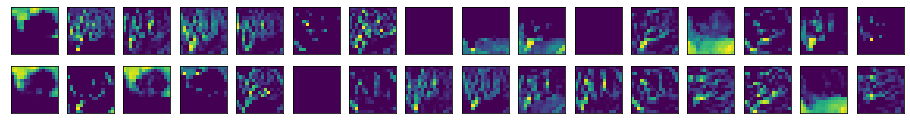

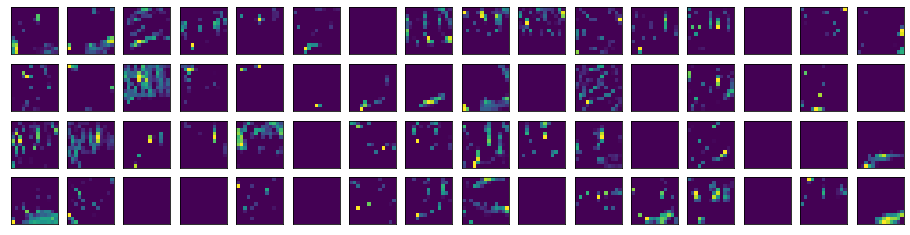

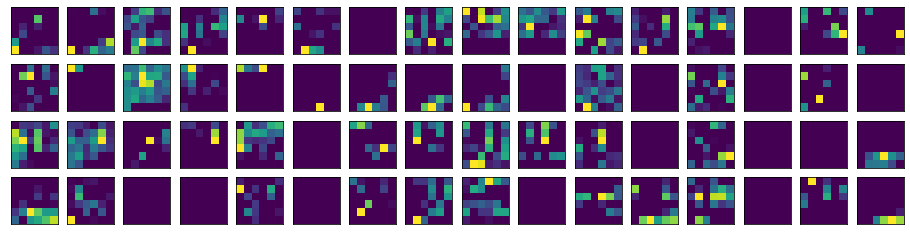

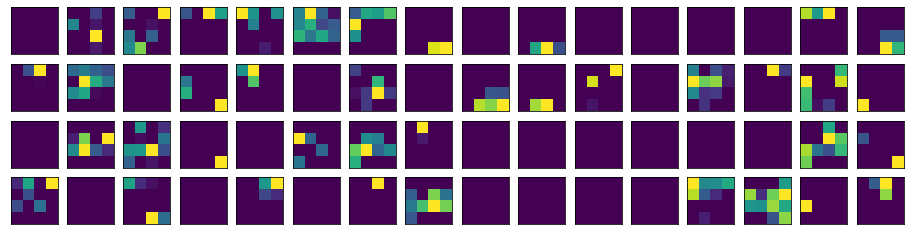

In [1]:
# 도구 준비
import os
import shutil
import random
import math

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import numpy as np

print(f'Tensorflow 버전을 확인합니다: {tf.__version__}')

# CIFAR-10 데이터셋: 10진 분류 이미지 데이터 셋 다운로드
# dataset_path = os.path.abspath(os.path.expanduser('~/.keras/datasets/')) # Linux
# if os.path.exists(dataset_path):
#     shutil.rmtree(dataset_path)
(_train_images, train_labels), (_test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 데이터 둘러보기
print(f'학습에 사용할 이미지는 {len(_train_images)}개 입니다.')
print(f'학습한 후 테스트(검증)에 사용할 이미지는 {len(_test_images)}개 입니다.')

# CIFAR-10 데이터 레이블
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(f'데이터의 레이블은 {len(class_names)}개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.')
print('레이블 번호와 레이블: ')
for i in range(0, len(class_names)):
    print(f'{i}: {class_names[i]}')

# 컬러 이미지 차원
print(f'학습 이미지 형태: {_train_images.shape}')
print(f'학습 레이블 형태: {train_labels.shape}')

print(f'테스트 이미지 형태: {_test_images.shape}')
print(f'테스트 레이블 형태: {test_labels.shape}')

# 컬러 이미지 데이터 살펴보기(빨강색, ,파란색)
print('데이터 상태')
print(_train_images[0]) #RGB

# 학습용 예제 이미지 확인! 
idx = 0 # 이미지확인 가능
fig1 = plt.figure(figsize=(6, 6))
ax = fig1.add_subplot()
axm = ax.imshow(_train_images[idx])
fig1.suptitle(f'Train image example [{idx}]', fontsize=20)
ax.set_title(f'Label: {class_names[train_labels[idx][0]]}', fontsize=16)
ax.grid(False)

# 학습 데이터 정규화
print('인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.')
print('따라서 이미지를 255로 나누어줍니다.')
train_images = _train_images / 255.0
test_images = _test_images / 255.0

# 정규화된 데이터 살펴보기
print('데이터 상태')
print(train_images[0])

# 데이터 셋 확인!
idx = 0
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot()
axm = ax.imshow(train_images[idx])
fig2.suptitle(f'Train image example [{idx}]', fontsize=20)
ax.set_title(f'Label: {class_names[train_labels[idx][0]]}', fontsize=16)
ax.grid(False)

# 데이터 셋 나열!
fig3 = plt.figure(figsize=(12, 12))
fig3.set_facecolor('white')
for i in range(25):
    ax = fig3.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[train_labels[i][0]])

# 데이터 셋 레이블 확인!
fig4 = plt.figure(figsize=(12, 12/5*2))
fig4.set_facecolor('white')
for i in range(10):
    ax = fig4.add_subplot(2, 5, i+1)
    for j in range(10000, len(train_images)):
        if train_labels[j] == i:
            break
    ax.imshow(train_images[j])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'[{train_labels[j][0]}] {class_names[train_labels[j][0]]}', fontsize=12)

# 학습 모델 생성!
#conv2d (Conv2D)가 가장 중요한 부분들 딥러닝이라고 부를 수 있는 부분
print('모델 생성')
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_images.shape[1:])),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

# 학습 모델 컴파일
print('모델 컴파일')
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 학습!
epochs = 20
history = model.fit(train_images, train_labels, 
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# 학습 손실 / 정확도, 검증 손실 / 정확도
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig1 = plt.figure(figsize=(6, 10))
ax = fig1.add_subplot(2, 1, 1)
ax.plot(epochs, loss, 'bo', label='Training loss')
ax.plot(epochs, val_loss, 'b', label='Validation loss')
ax.set_ylim((0, math.ceil(max(max(loss), max(val_loss)))))
ax.set_title('Training and validation loss', fontsize=12)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Loss', fontsize=10)
ax.legend()

ax = fig1.add_subplot(2, 1, 2)
ax.plot(epochs, acc, 'bo', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_ylim((0, math.ceil(max(max(acc), max(val_acc)))))
ax.set_title('Training and validation accuracy', fontsize=12)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend()

# (학습할 때 이미 했지만…) 모델 테스트
print(f'{len(test_images)}개 이미지로 테스트합니다.')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print()
print(f'테스트 이미지 정확도: {test_acc}')

# 테스트 이미지로 확인!
idx = 0
fig5 = plt.figure(figsize=(6, 6))
ax = fig5.add_subplot()
axm = ax.imshow(test_images[idx])
fig5.suptitle(f'Test Image [{idx}]', fontsize=20)
ax.set_title(f'Label: {class_names[test_labels[idx][0]]}', fontsize=16)
ax.grid(False)

# 이 사진이 A일 확률은?
print('확률 모델')
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
probability_model.summary()

print('각 테스트이미지별 레이블 확률 계산')
predictions = probability_model.predict(test_images)

# 테스트 이미지의 예측 확률
idx = 0
print(f'예측 레이블은 확률 중 최대 확률을 선택합니다.')
print(f'Test image {idx} prediction: \n{predictions[idx]}')
print(f'Maximum probability label: {np.argmax(predictions[idx])}')
print(f'Actual label: {test_labels[idx][0]}')

# 예측 확률 함수!
# 이미지 함수 정의
def draw_image(ax, prob, image, true_label):
    ax.grid(False)
    axm = ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_label = np.argmax(prob)
    if true_label == predicted_label:
        color = 'blue'
    else:
        color = 'red'
    predicted_name = class_names[predicted_label]
    true_name = class_names[true_label]
    label = f'{predicted_name} {np.max(prob)*100:3.0f}% ({true_name})'
    ax.set_title(f'{label}', color=color)
    
def draw_bar(ax, prob, true_label):
    ax.grid(False)
    ax.set_xticks(range(10))
    ax.set_yticks(np.arange(0, 1.2, 0.2))
    bar = ax.bar(range(10), prob, color='gray')
    ax.set_ylim((0, 1))
    predicted_label = np.argmax(prob)
    bar[predicted_label].set_color('red')
    bar[true_label].set_color('blue')

# 예측 결과?
for i in range(len(test_images)):
    if test_labels[i][0] == np.argmax(predictions[i]):
        break
fig6 = plt.figure(figsize=(6, 3))
ax = fig6.add_subplot(1, 2, 1)
draw_image(ax, predictions[i], test_images[i], test_labels[i][0])
ax = fig6.add_subplot(1, 2, 2)
draw_bar(ax, predictions[i], test_labels[i][0])

for i in range(len(test_images)):
    if test_labels[i] != np.argmax(predictions[i]):
        break
fig7 = plt.figure(figsize=(6, 3))
ax = fig7.add_subplot(1, 2, 1)
draw_image(ax, predictions[i], test_images[i], test_labels[i][0])
ax = fig7.add_subplot(1, 2, 2)
draw_bar(ax, predictions[i], test_labels[i][0])

# 예측 확률과 예측 결과
base = 5000
rows = 1 * 5
cols = 2 * 3
fig8 = plt.figure(figsize=(2.5*cols, 2.5*rows))
fig8.set_facecolor('white')
for i in range(0, rows*cols, 2):
    ax = fig8.add_subplot(rows, cols, i+1)
    draw_image(ax, predictions[base+i], test_images[base+i], test_labels[base+i][0])
    ax = fig8.add_subplot(rows, cols, i+2)
    draw_bar(ax, predictions[base+i], test_labels[base+i][0])

# CNN 시각화! ai가 직접 특징을 잡아서 만드게 만든게 cnn
outputs = [layer.output for layer in model.layers[:-3]]
intermediate_model = tf.keras.models.Model(inputs=model.input,
                                           outputs=outputs)
intermediate_model.summary()

# CNN 시각화!
image_idx = 0
model_idx = 0
intermediate_output = intermediate_model.predict(tf.expand_dims(test_images[image_idx], 0))
data = intermediate_output[model_idx]

fig9 = plt.figure(figsize=(3, 3))
fig9.set_facecolor('white')
ax = fig9.add_subplot()
ax.imshow(train_images[image_idx])
ax.grid(False)

fig10 = plt.figure(figsize=(16, math.ceil(data.shape[-1]/16)))
fig10.set_facecolor('white')
for i in range(0, data.shape[-1]):
    ax = fig10.add_subplot(math.ceil(data.shape[-1]/16), 16, i+1)
    ax.imshow(data[0, :, :, i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

image_idx = 0
intermediate_output = intermediate_model.predict(tf.expand_dims(test_images[image_idx], 0))

fig9 = plt.figure(figsize=(3, 3))
fig9.set_facecolor('white')
ax = fig9.add_subplot()
ax.imshow(train_images[image_idx])
ax.grid(False)

for layer_idx in range(0, len(intermediate_output)):
    data = intermediate_output[layer_idx]
    fig = plt.figure(figsize=(16, math.ceil(data.shape[-1]/16)))
    fig.set_facecolor('white')
    for i in range(0, data.shape[-1]):
        ax = fig.add_subplot(math.ceil(data.shape[-1]/16), 16, i+1)
        ax.imshow(data[0, :, :, i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)